## Redes Neurais Artificiais 2022.2

#### Atividade Avaliativa 2.3

- **Disciplina**: Redes Neurais Artificiais 2022.2

- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)

- **Github**: https://github.com/jo-alves01/rna-aa3


Sobre a base de dados:

O dataset "Maternal Health Risk Data Set" contém informações relacionadas à saúde materna e risco de complicações durante a gestação. As variáveis do conjunto de dados incluem informações como idade, além de dados clínicos, como pressão arterial e níveis de glicose no sangue.

#### Equipe:

Carlos Gabriel da Silva Machado - 1815080079

Davi Rodrigues de França - 1915080053

Gabriella Rabelo Monteiro - 1915080011

Josué Costa dos Santos Alves - 1715080615

Victor Hugo Santos de Lima - 1915080025

## Bibliotecas

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns
import pickle
import pprint
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

2023-03-23 22:45:20.124352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 22:45:21.272451: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 22:45:21.272482: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-23 22:45:24.657221: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Funções úteis

In [2]:
def loss_graph(loss):
    loss_values = loss
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.title("Erro no Treinamento")
    plt.plot(loss_values)
    plt.show()

In [3]:
def plot_hist_box(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"Histograma de {col}")
    ax[1].set_title(f"Boxplot de {col}")

    plt.show()

In [4]:
def plot_cf(cf1):

    try:
        fig, ax = plt.subplots()
        risks = mhr_dataset_base["RiskLevel"].unique()
        im = ax.imshow(cf1)
        ax.set_xticks(np.arange(len(risks)), labels=risks)
        ax.set_yticks(np.arange(len(risks)), labels=risks)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        for i in range(len(risks)):
            for j in range(len(risks)):
                ax.text(j, i, cf1[i, j], ha="center", va="center", color="w")
        
        ax.set_title("")
        plt.show()
    except Exception as e:
        print(e)

## Leitura do Dataset

In [5]:
mhr_dataset_base = pd.read_csv("./maternal_health_risk_data_set.csv")

In [6]:
mhr_dataset_base.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [7]:
mhr_dataset_base.rename(columns={"BS": "BloodSugar"}, inplace=True)
mhr_dataset_base.head()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


## Apresentação do dataset

O dataset possui 7 atribuitos no total, sendo eles:


*   **Age**: Idade da mulher;
*   **SystolicBP**: Valor superior da pressão arterial em mmHg;
*   **DiastolicBP**: Valor mais baixo da pressão arterial em mmHg;
*   **BS**: Os níveis de glicose no sangue, em termos de uma concentração molar (mmol/L);
*   **BodyTemp**: Temperatura corporal da mulher (em °F);
*   **HeartRate**: Uma frequência cardíaca normal em repouso em batimentos por minuto;
*   **Risk Level**: Nível de intensidade de risco previsto durante a gravidez.

Os tipos dos dados são: Age: inteiro, SystolicBP: inteiro, DiastolicBP: inteiro, BS: float, BodyTemp: float, HeartRate: inteiro, RiskLevel: objeto.

As informações podem ser observadas abaixo:

In [8]:
mhr_dataset_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BloodSugar   1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Verificação da quantidade de exemplos e atributos preditores

In [9]:
columns = len(mhr_dataset_base.axes[1])
rows = len(mhr_dataset_base.axes[0])

print("Quantidade de exemplo:",rows)
print("Quantidade de atributos preditores:",columns-1,)
print("Atributos preditores:",mhr_dataset_base.axes[1][0], mhr_dataset_base.axes[1][1], mhr_dataset_base.axes[1][2], mhr_dataset_base.axes[1][3], mhr_dataset_base.axes[1][4], mhr_dataset_base.axes[1][5])
print("Quantidade de atributos alvo:", columns-(columns-1))
print("Atributo alvo:",mhr_dataset_base.axes[1][6])

Quantidade de exemplo: 1014
Quantidade de atributos preditores: 6
Atributos preditores: Age SystolicBP DiastolicBP BloodSugar BodyTemp HeartRate
Quantidade de atributos alvo: 1
Atributo alvo: RiskLevel


Checando se existem dados faltantes no dataset:

In [10]:
mhr_dataset_base.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BloodSugar     0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Verificando quantos exemplos existem para cada classe do atributo alvo:

In [11]:
mhr_dataset_base['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

Abaixo pode-se observar alguns dados gerais sobre o dataset:

In [12]:
mhr_dataset_base.describe()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Abaixo é possível observar a distribuição dos dados dentro do dataset

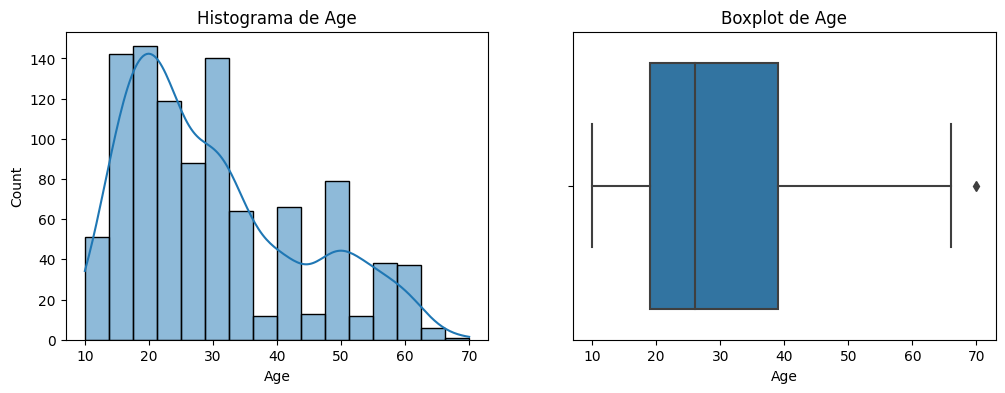

In [13]:
plot_hist_box(mhr_dataset_base, 'Age')

É possível observar que o atributo Age possui sua mediana em torno de 26 anos e que existem muitos exemplos entre os valores de 20 até 35 anos, enquanto valores maiores e menores que esse intervalo possuem poucos exemplos.

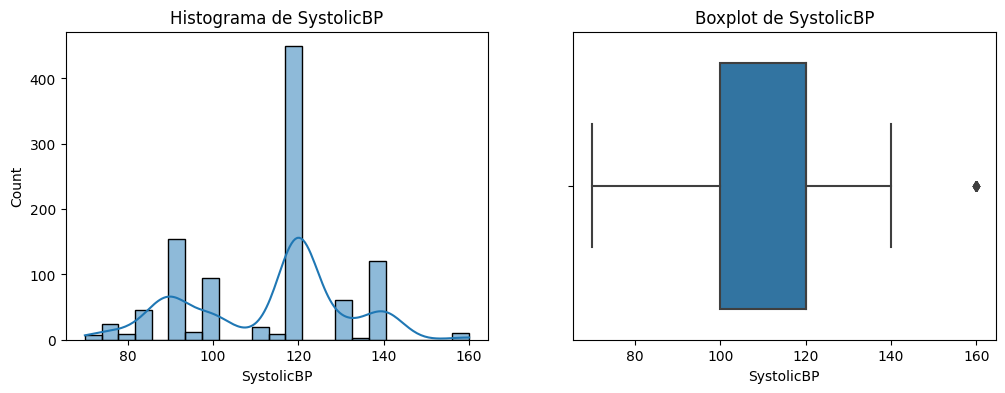

In [14]:
plot_hist_box(mhr_dataset_base, 'SystolicBP')

Ao examinar os gráficos acima, pode-se afirmar que a mediana do atributo SystolicBP é em torno de 120, com uma grande quantidade de exemplos na faixa de 100 até 120, além de verificar um pequeno grupo de exemplos entre os valores de 80 até 100, e entre 130 até 140. É também visível um *outlier* no valor 160.

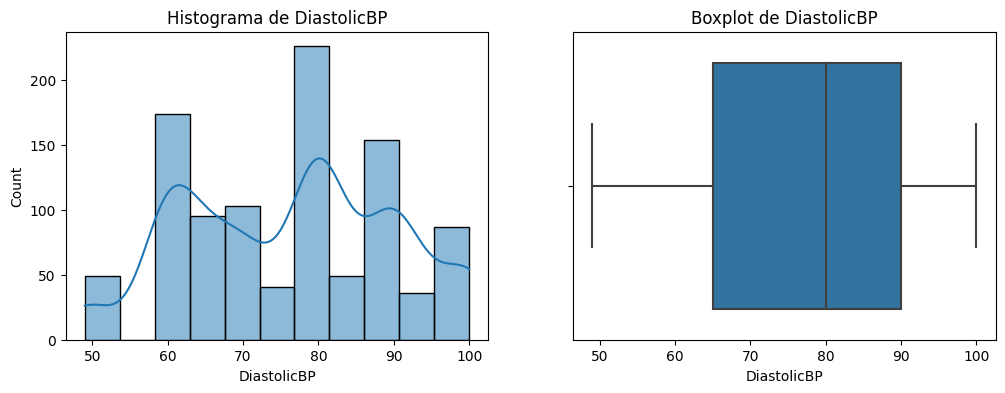

In [15]:
plot_hist_box(mhr_dataset_base, 'DiastolicBP')

O atributo DiastolicBP possui sua mediana em 80, com exemplos relativamente bem distribuídos, principalmente na faixa entre 65 e 90.

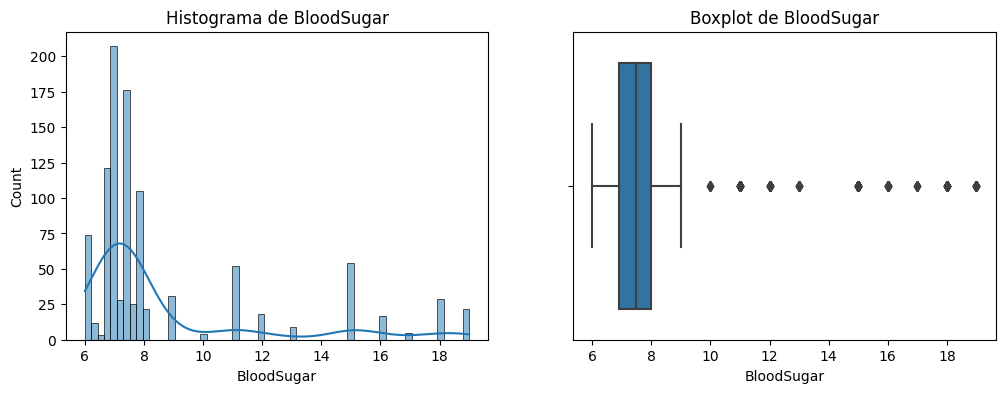

In [16]:
plot_hist_box(mhr_dataset_base, 'BloodSugar')

Diferente do atributo DiastolicBP, o atributo BloodSugar possui exemplos dispersos, com sua grande maioria entre os valores de 7 e 8, sua mediana é em torno de 7,5. É bastante visível os diversos *outliers* existentes neste atributo.

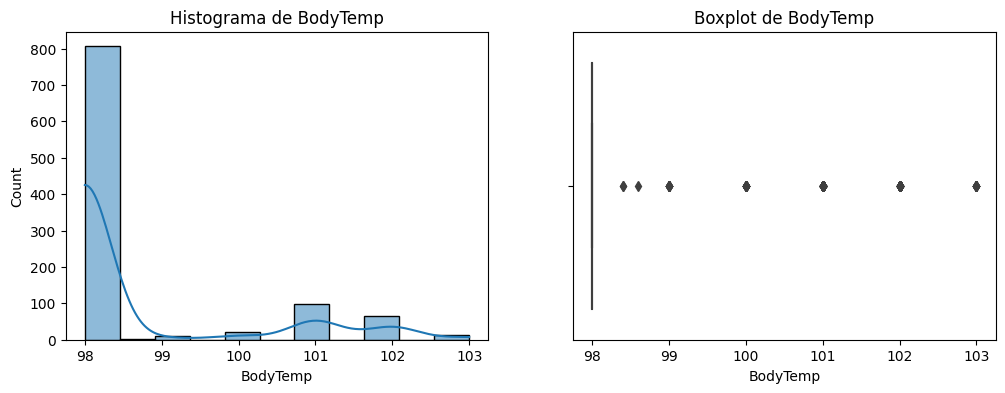

In [17]:
plot_hist_box(mhr_dataset_base, 'BodyTemp')

É notável a dispariedade dos valores dos exemplos do atributo BodyTemp, com sua mediana e a maioria dos exemplos com valor 98, e os outro valores sendo considerados quase *outliers*, apesar de estarem próximo do valor 98.

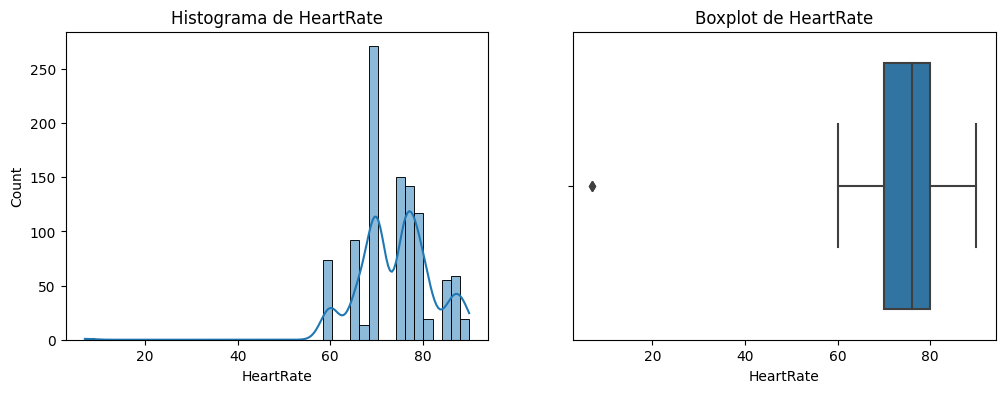

In [18]:
plot_hist_box(mhr_dataset_base, 'HeartRate')

Por último, o atributo HeartRate possui a maioria dos seus exemplos entre 70 e 80, e sua mediana é de aproximadamente 75. É possível obervar a existência de um *outlier* próximo do valor 10.

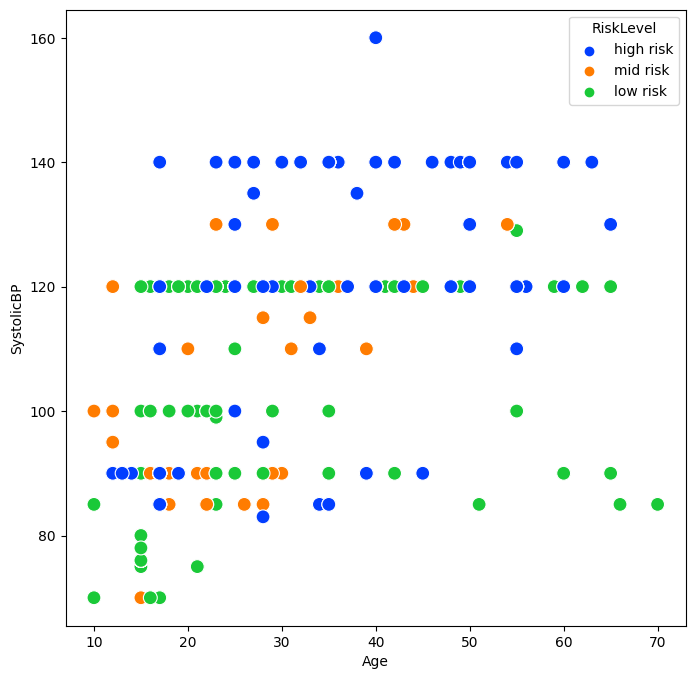

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
g = sns.scatterplot(
    x="Age",
    y="SystolicBP",
    hue="RiskLevel",
    data=mhr_dataset_base,
    palette=sns.color_palette(palette='bright', n_colors=3),
    hue_order=['high risk', 'mid risk', 'low risk'],
    s=100
)

## Preparação dos dados

### Categorização dos dados

## Separando a base de dados em atributos preditores e alvos

In [20]:
X = mhr_dataset_base.drop(columns=["RiskLevel"],axis=1)
y = mhr_dataset_base["RiskLevel"]

## Realizando a normalização dos dados

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train_norm = (X_train - X_train.min(axis=0))/(X_train.max(axis=0) - X_train.min(axis=0))
X_test_norm = (X_test - X_test.min(axis=0))/(X_test.max(axis=0) - X_test.min(axis=0))

## GridSearch

In [28]:
mlp = MLPClassifier(activation="relu", solver="adam", max_iter=300, verbose=True, random_state=42)
mlp.fit(X_train_norm, y_train)

Iteration 1, loss = 1.13380126
Iteration 2, loss = 1.11240979
Iteration 3, loss = 1.09624417
Iteration 4, loss = 1.08225116
Iteration 5, loss = 1.06986501
Iteration 6, loss = 1.06027545
Iteration 7, loss = 1.05069781
Iteration 8, loss = 1.04263650
Iteration 9, loss = 1.03470301
Iteration 10, loss = 1.02621251
Iteration 11, loss = 1.01788056
Iteration 12, loss = 1.00936575
Iteration 13, loss = 1.00120033
Iteration 14, loss = 0.99253898
Iteration 15, loss = 0.98428019
Iteration 16, loss = 0.97576970
Iteration 17, loss = 0.96705300
Iteration 18, loss = 0.95936753
Iteration 19, loss = 0.95116451
Iteration 20, loss = 0.94320127
Iteration 21, loss = 0.93575581
Iteration 22, loss = 0.92799028
Iteration 23, loss = 0.92096093
Iteration 24, loss = 0.91450604
Iteration 25, loss = 0.90768292
Iteration 26, loss = 0.90157738
Iteration 27, loss = 0.89558755
Iteration 28, loss = 0.88976653
Iteration 29, loss = 0.88429802
Iteration 30, loss = 0.87907828
Iteration 31, loss = 0.87425602
Iteration 32, los

/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42, verbose=True)

#### Definindo a regra da pirâmide

In [29]:
def nh_value (alfa, val1, val2):
    nh = alfa * np.sqrt((val1 * val2))
    return int(nh)


ni = mlp.n_features_in_
no = len(mlp.classes_)

alfa1 = 0.5
alfa2 = 2
alfa3 = 3

nh1 = nh_value(alfa1, ni, no)
print(nh1)

nh2 = nh_value(alfa2, ni, no)
print(nh2)

nh3 = nh_value(alfa3, ni, no)
print(nh3)

2
8
12


Quantidade neurônios:

- Com alfa = 0.5: 2 neurônios
- Com alfa = 2: 8 neurônios
- Com alfa = 3: 12 neurônios

In [30]:
scoring_ = "recall_macro"
epochs = [300]
hidden_layer_sizes = [
    (1,1), (5, 3), (3, 5), (4, 4), (2, 6), (6, 2), (6, 6),
    (5, 7), (4, 8), (8, 4),(9, 3), (3, 9), (2, 10), (10, 2),
    (24,32), (28, 28)
]
activation = ["relu", "logistic"]
solver = ["adam", "sgd"]
learning_rate = ["constant", "adaptive"]
n_iter_no_change = [60]
early_stopping = True

In [31]:
pipe_sgd = Pipeline([("mlp_sgd", mlp)])
sgd_grid_params = {
    'mlp_sgd__hidden_layer_sizes': hidden_layer_sizes,
    'mlp_sgd__activation': activation,
    'mlp_sgd__solver': [solver[1]],
    'mlp_sgd__momentum': [0.2, 0.3, 0.4, 0.5, 0.6],
    'mlp_sgd__batch_size': [16, 32],
    'mlp_sgd__n_iter_no_change': n_iter_no_change,
    "mlp_sgd__max_iter": epochs
}

In [32]:
pipe_adam = Pipeline([("mlp_adam", mlp)])
adam_grid_params= {
    'mlp_adam__hidden_layer_sizes': hidden_layer_sizes,
    'mlp_adam__activation': activation,
    'mlp_adam__solver': [solver[0]],
    'mlp_adam__batch_size': [16, 32],
    'mlp_adam__n_iter_no_change': n_iter_no_change,
    "mlp_adam__max_iter": epochs
}

In [33]:
sgd_grid_search = GridSearchCV(pipe_sgd, param_grid=sgd_grid_params,scoring=scoring_, n_jobs=-1, verbose=False, cv=3)

adam_grid_search = GridSearchCV(pipe_adam, param_grid=adam_grid_params,scoring=scoring_, n_jobs=-1, verbose=False, cv=3)

In [34]:
sgd_grid_search.fit(X_train_norm,y_train)
adam_grid_search.fit(X_train_norm,y_train)

Iteration 1, loss = 1.60080165
Iteration 2, loss = 1.58048947
Iteration 3, loss = 1.56101960
Iteration 4, loss = 1.54222884
Iteration 1, loss = 1.60080309
Iteration 5, loss = 1.52444574
Iteration 2, loss = 1.58048862
Iteration 1, loss = 1.60203590
Iteration 3, loss = 1.56106515
Iteration 2, loss = 1.58144054
Iteration 4, loss = 1.54228268
Iteration 6, loss = 1.50704737
Iteration 3, loss = 1.56202233
Iteration 5, loss = 1.52431292
Iteration 6, loss = 1.50712243
Iteration 4, loss = 1.54337297
Iteration 7, loss = 1.49049316
Iteration 7, loss = 1.49044518
Iteration 5, loss = 1.52547185
Iteration 8, loss = 1.47451070
Iteration 8, loss = 1.47447890
Iteration 6, loss = 1.50827562
Iteration 9, loss = 1.45937638
Iteration 9, loss = 1.45915670
Iteration 7, loss = 1.49177668
Iteration 10, loss = 1.44485035
Iteration 10, loss = 1.44498150
Iteration 8, loss = 1.47600300
Iteration 11, loss = 1.43090121
Iteration 11, loss = 1.43098133
Iteration 9, loss = 1.46093886
Iteration 12, loss = 1.41733867
Ite

In [ ]:
sgd_grid_results = pd.DataFrame(sgd_grid_search.cv_results_).sort_values(by="rank_test_score", ignore_index=True)
adam_grid_results = pd.DataFrame(adam_grid_search.cv_results_).sort_values(by="rank_test_score", ignore_index=True)

In [ ]:
# SGD

pprint.pprint(
    sgd_grid_results.params[0]
)
print("\n")
pprint.pprint(sgd_grid_results.params[1])
print("\n")
pprint.pprint(sgd_grid_results.params[2])

{'mlp_sgd__activation': 'relu',
 'mlp_sgd__batch_size': 16,
 'mlp_sgd__hidden_layer_sizes': (28, 28),
 'mlp_sgd__max_iter': 300,
 'mlp_sgd__momentum': 0.6,
 'mlp_sgd__n_iter_no_change': 60,
 'mlp_sgd__solver': 'sgd'}


{'mlp_sgd__activation': 'relu',
 'mlp_sgd__batch_size': 16,
 'mlp_sgd__hidden_layer_sizes': (24, 32),
 'mlp_sgd__max_iter': 300,
 'mlp_sgd__momentum': 0.6,
 'mlp_sgd__n_iter_no_change': 60,
 'mlp_sgd__solver': 'sgd'}


{'mlp_sgd__activation': 'relu',
 'mlp_sgd__batch_size': 16,
 'mlp_sgd__hidden_layer_sizes': (24, 32),
 'mlp_sgd__max_iter': 300,
 'mlp_sgd__momentum': 0.5,
 'mlp_sgd__n_iter_no_change': 60,
 'mlp_sgd__solver': 'sgd'}


In [ ]:
# ADAM

pprint.pprint(adam_grid_results.params[0])
print("\n")
pprint.pprint(adam_grid_results.params[1])
print("\n")
pprint.pprint(adam_grid_results.params[2])

{'mlp_adam__activation': 'relu',
 'mlp_adam__batch_size': 16,
 'mlp_adam__hidden_layer_sizes': (28, 28),
 'mlp_adam__max_iter': 300,
 'mlp_adam__n_iter_no_change': 60,
 'mlp_adam__solver': 'adam'}


{'mlp_adam__activation': 'relu',
 'mlp_adam__batch_size': 16,
 'mlp_adam__hidden_layer_sizes': (24, 32),
 'mlp_adam__max_iter': 300,
 'mlp_adam__n_iter_no_change': 60,
 'mlp_adam__solver': 'adam'}


{'mlp_adam__activation': 'relu',
 'mlp_adam__batch_size': 32,
 'mlp_adam__hidden_layer_sizes': (28, 28),
 'mlp_adam__max_iter': 300,
 'mlp_adam__n_iter_no_change': 60,
 'mlp_adam__solver': 'adam'}


In [ ]:
adam_grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp_adam__activation,param_mlp_adam__batch_size,param_mlp_adam__hidden_layer_sizes,param_mlp_adam__max_iter,param_mlp_adam__n_iter_no_change,param_mlp_adam__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.932493,0.674287,0.009704,0.003128,relu,16,"(28, 28)",300,60,adam,"{'mlp_adam__activation': 'relu', 'mlp_adam__ba...",0.713008,0.700823,0.652895,0.688909,0.025947,1
1,9.284204,0.393838,0.007060,0.000789,relu,16,"(24, 32)",300,60,adam,"{'mlp_adam__activation': 'relu', 'mlp_adam__ba...",0.670283,0.688173,0.635983,0.664813,0.021655,2
2,4.758393,0.380894,0.008748,0.003619,relu,32,"(28, 28)",300,60,adam,"{'mlp_adam__activation': 'relu', 'mlp_adam__ba...",0.637475,0.698034,0.643323,0.659611,0.027274,3
3,4.992215,0.382355,0.007712,0.001847,relu,32,"(24, 32)",300,60,adam,"{'mlp_adam__activation': 'relu', 'mlp_adam__ba...",0.678504,0.648643,0.645267,0.657471,0.014936,4
4,7.835303,0.037996,0.006210,0.000254,relu,16,"(10, 2)",300,60,adam,"{'mlp_adam__activation': 'relu', 'mlp_adam__ba...",0.616171,0.668344,0.672361,0.652292,0.025594,5


In [ ]:
# Modelos para o SGD


mlp_sgd_01 = MLPClassifier(
    activation=sgd_grid_results.param_mlp_sgd__activation[0],
    solver=sgd_grid_results.param_mlp_sgd__solver[0],
    batch_size=sgd_grid_results.param_mlp_sgd__batch_size[0],
    hidden_layer_sizes=sgd_grid_results.param_mlp_sgd__hidden_layer_sizes[0],
    max_iter=sgd_grid_results.param_mlp_sgd__max_iter[0],
    n_iter_no_change=sgd_grid_results.param_mlp_sgd__n_iter_no_change[0],
    momentum=sgd_grid_results.param_mlp_sgd__momentum[0]
)

mlp_sgd_02 = MLPClassifier(
    activation=sgd_grid_results.param_mlp_sgd__activation[1],
    solver=sgd_grid_results.param_mlp_sgd__solver[1],
    batch_size=sgd_grid_results.param_mlp_sgd__batch_size[1],
    hidden_layer_sizes=sgd_grid_results.param_mlp_sgd__hidden_layer_sizes[1],
    max_iter=sgd_grid_results.param_mlp_sgd__max_iter[1],
    n_iter_no_change=sgd_grid_results.param_mlp_sgd__n_iter_no_change[1],
    momentum=sgd_grid_results.param_mlp_sgd__momentum[1]

)

mlp_sgd_03 = MLPClassifier(
    activation=sgd_grid_results.param_mlp_sgd__activation[2],
    solver=sgd_grid_results.param_mlp_sgd__solver[2],
    batch_size=sgd_grid_results.param_mlp_sgd__batch_size[2],
    hidden_layer_sizes=sgd_grid_results.param_mlp_sgd__hidden_layer_sizes[2],
    max_iter=sgd_grid_results.param_mlp_sgd__max_iter[2],
    n_iter_no_change=sgd_grid_results.param_mlp_sgd__n_iter_no_change[2],
    momentum=sgd_grid_results.param_mlp_sgd__momentum[2]
)

In [ ]:
# Modelos para o ADAM


mlp_adam_01 = MLPClassifier(
    activation=adam_grid_results.param_mlp_adam__activation[0],
    solver=adam_grid_results.param_mlp_adam__solver[0],
    batch_size=adam_grid_results.param_mlp_adam__batch_size[0],
    hidden_layer_sizes=adam_grid_results.param_mlp_adam__hidden_layer_sizes[0],
    max_iter=adam_grid_results.param_mlp_adam__max_iter[0],
    n_iter_no_change=adam_grid_results.param_mlp_adam__n_iter_no_change[0]
)

mlp_adam_02 = MLPClassifier(
    activation=adam_grid_results.param_mlp_adam__activation[1],
    solver=adam_grid_results.param_mlp_adam__solver[1],
    batch_size=adam_grid_results.param_mlp_adam__batch_size[1],
    hidden_layer_sizes=adam_grid_results.param_mlp_adam__hidden_layer_sizes[1],
    max_iter=adam_grid_results.param_mlp_adam__max_iter[1],
    n_iter_no_change=adam_grid_results.param_mlp_adam__n_iter_no_change[1]
)

mlp_adam_03 = MLPClassifier(
    activation=adam_grid_results.param_mlp_adam__activation[2],
    solver=adam_grid_results.param_mlp_adam__solver[2],
    batch_size=adam_grid_results.param_mlp_adam__batch_size[2],
    hidden_layer_sizes=adam_grid_results.param_mlp_adam__hidden_layer_sizes[2],
    max_iter=adam_grid_results.param_mlp_adam__max_iter[2],
    n_iter_no_change=adam_grid_results.param_mlp_adam__n_iter_no_change[2]
)

## Matriz Confusão

**ADAM**

In [ ]:
adam_01 = mlp_adam_01.fit(X_train_norm, y_train)
adam_02 = mlp_adam_02.fit(X_train_norm, y_train)
adam_03 = mlp_adam_03.fit(X_train_norm, y_train)

/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**SGD**

In [ ]:
sgd_01 = mlp_sgd_01.fit(X_train_norm, y_train)
sgd_02 = mlp_sgd_02.fit(X_train_norm, y_train)
sgd_03 = mlp_sgd_03.fit(X_train_norm, y_train)

/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


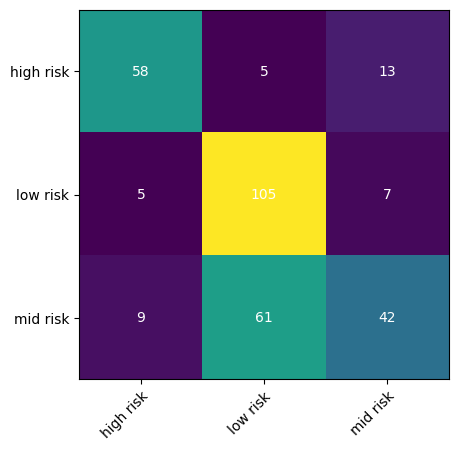

In [ ]:
adam_01_pred = adam_01.predict(X_test_norm)
adam_01_cf = confusion_matrix(y_test, adam_01_pred)
plot_cf(adam_01_cf)

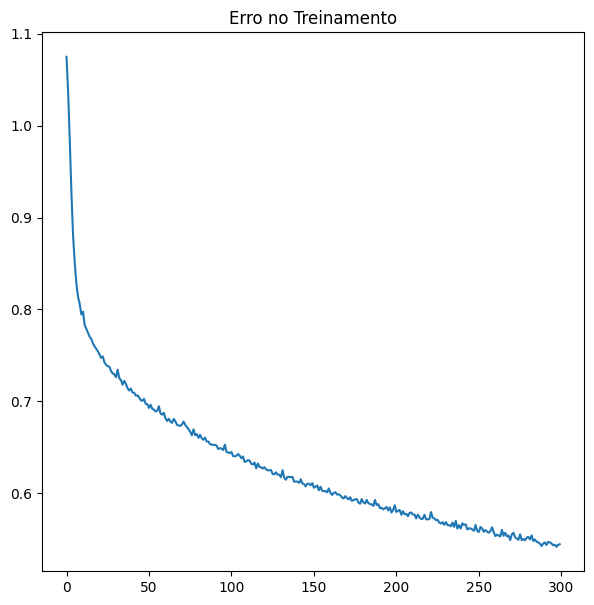

In [ ]:
loss_graph(adam_01.loss_curve_)

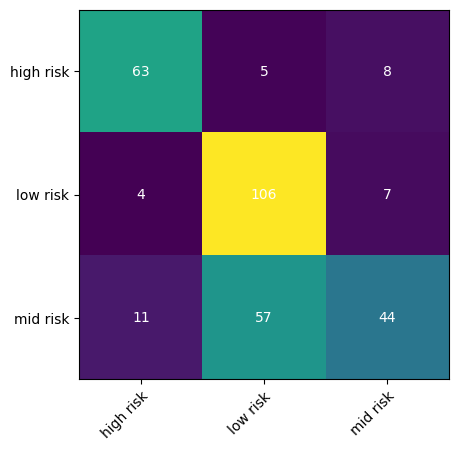

In [ ]:
adam_02_pred = adam_02.predict(X_test_norm)
adam_02_cf = confusion_matrix(y_test, adam_02_pred)
plot_cf(adam_02_cf)

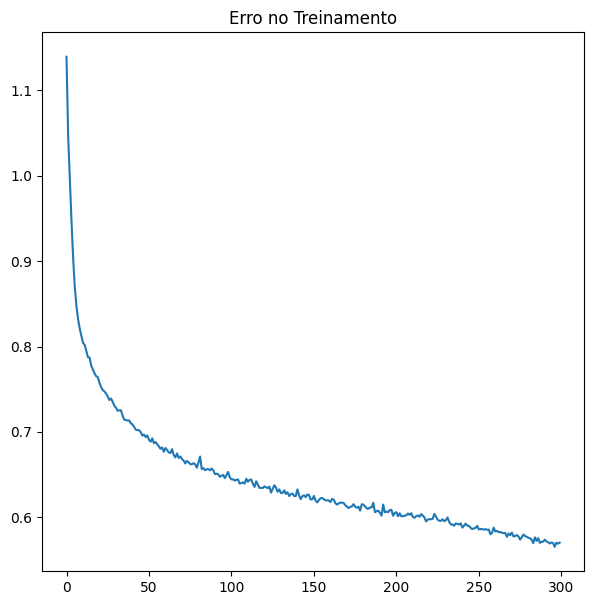

In [ ]:
loss_graph(adam_02.loss_curve_)

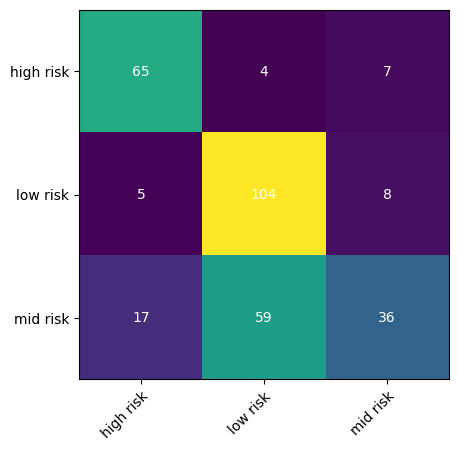

In [ ]:
adam_03_pred = adam_03.predict(X_test_norm)
adam_03_cf = confusion_matrix(y_test, adam_03_pred)
plot_cf(adam_03_cf)

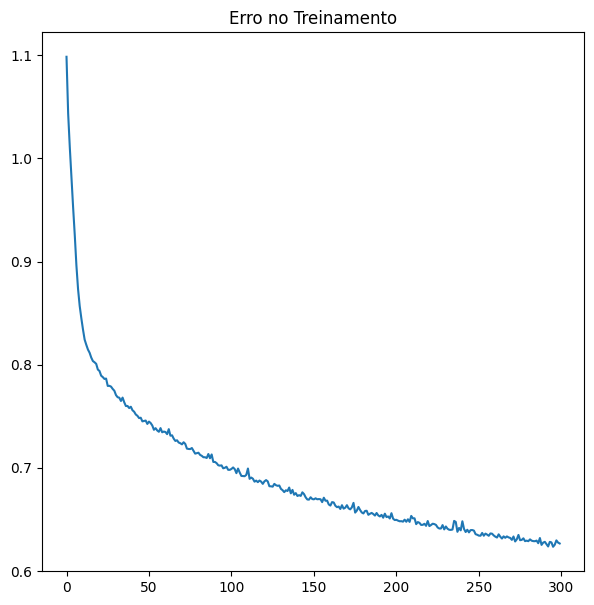

In [ ]:
loss_graph(adam_03.loss_curve_)

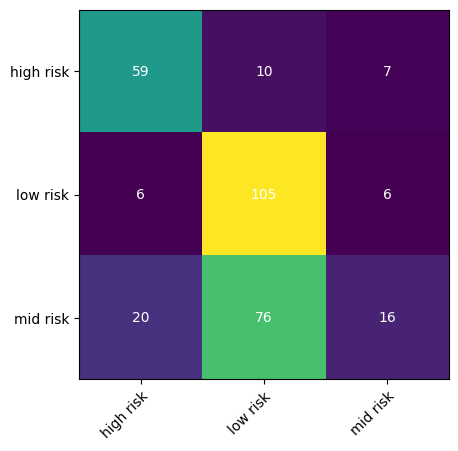

In [ ]:
sgd_01_pred = mlp_sgd_01.predict(X_test_norm)
sgd_01_cf = confusion_matrix(y_test, sgd_01_pred)
plot_cf(sgd_01_cf)

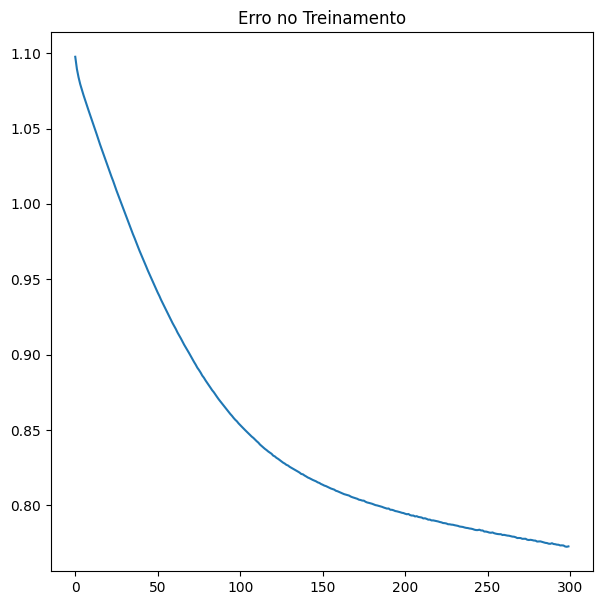

In [ ]:
loss_graph(sgd_01.loss_curve_)

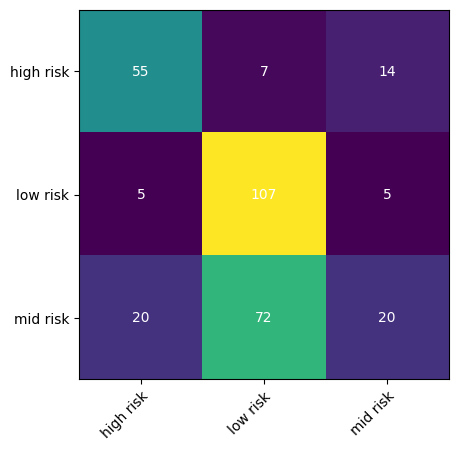

In [ ]:
sgd_02_pred = mlp_sgd_02.predict(X_test_norm)
sgd_02_cf = confusion_matrix(y_test, sgd_02_pred)
plot_cf(sgd_02_cf)

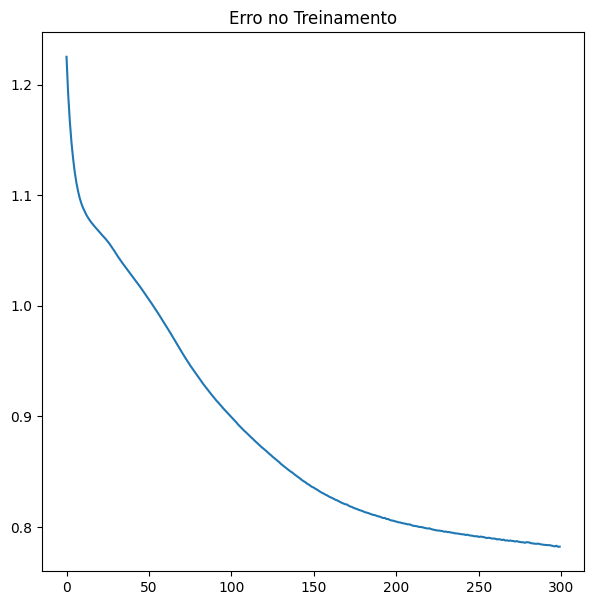

In [ ]:
loss_graph(sgd_02.loss_curve_)

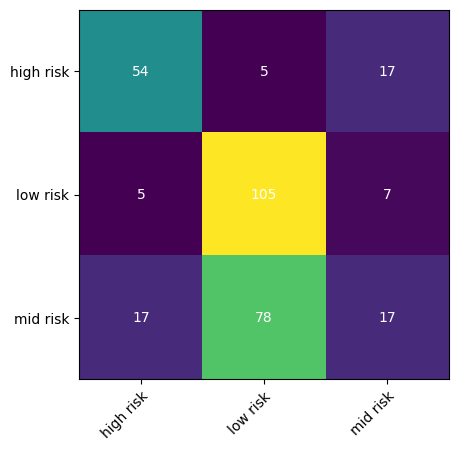

In [ ]:
sgd_03_pred = mlp_sgd_03.predict(X_test_norm)
sgd_03_cf = confusion_matrix(y_test, sgd_03_pred)
plot_cf(sgd_03_cf)

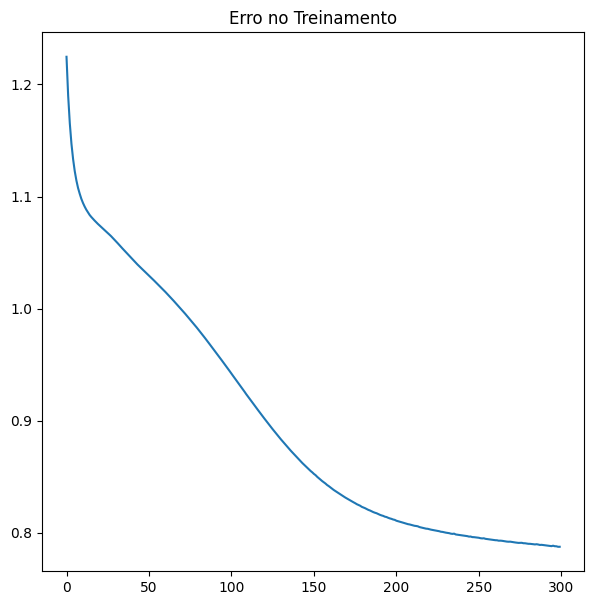

In [ ]:
loss_graph(sgd_03.loss_curve_)

## K-FOLD

In [ ]:
kfold = KFold(n_splits=3,shuffle=True)
result1_adam = cross_val_score(adam_01, X_test_norm, y_test, cv = kfold, scoring='recall_macro')
result2_adam = cross_val_score(adam_02, X_test_norm, y_test, cv = kfold, scoring='recall_macro')
result3_adam = cross_val_score(adam_03, X_test_norm, y_test, cv = kfold, scoring='recall_macro')

/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic 

In [ ]:
result1_sgd = cross_val_score(sgd_01, X_test_norm, y_test, cv = kfold, scoring='recall_macro')
result2_sgd = cross_val_score(sgd_02, X_test_norm, y_test, cv = kfold, scoring='recall_macro')
result3_sgd = cross_val_score(sgd_03, X_test_norm, y_test, cv = kfold, scoring='recall_macro')

/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/carlos-machado/.pyenv/versions/3.9.16/envs/facul-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic 

In [ ]:
print(f"Resultado para mlp_sgd_01: {round(np.sum(result1_sgd)/3, 4)}")
print(f"Resultado para mlp_sgd_02: {round(np.sum(result2_sgd)/3, 4)}")
print(f"Resultado para mlp_sgd_03: {round(np.sum(result3_sgd)/3, 4)}")

Resultado para mlp_sgd_01: 0.5617
Resultado para mlp_sgd_02: 0.5723
Resultado para mlp_sgd_03: 0.4775


In [ ]:
print(f"Resultado para mlp_adam_01: {round(np.sum(result1_adam)/3, 4)}")
print(f"Resultado para mlp_adam_02: {round(np.sum(result2_adam)/3, 4)}")
print(f"Resultado para mlp_adam_03: {round(np.sum(result3_adam)/3, 4)}")

Resultado para mlp_adam_01: 0.6467
Resultado para mlp_adam_02: 0.6796
Resultado para mlp_adam_03: 0.663
